# 과제1, 바텀듀오의 티어

## 라이브러리, 데이터 로드

In [937]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In [4]:
url='*****************************************************'

In [ ]:
adc_sup_pick_red

In [ ]:
lol_data=data.text
lol_data=lol_data.replace('\n', ',\n')
lol_data='['+lol_data+']'
lol_data=lol_data.replace(']},\n]',']}\n]')

In [ ]:
f = open("data.txt", 'w')
f.write(lol_data)
f.close()

In [ ]:
lol_data=json.loads(lol_data)

In [ ]:
output_df=json_normalize(lol_data)

In [790]:
sample=output_df
sample.reset_index(inplace=True)
del sample['index']
del sample['Unnamed: 0']
sample

,seasonid,queueid,gameid,participantidentities,gameversion,platformid,gamemode,mapid,gametype,teams,participants,gameduration,gamecreation,participantextendedstats
0,13,420,4621713273,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 14561, 'neu...",1514,1599158094,"[{'participantid': 1, 'position': 'MID', 'tier..."
1,13,420,4621713359,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': True, 'firstinhibitor': False...","[{'stats': {'physicaldamagedealt': 95848, 'neu...",2004,1599158200,"[{'participantid': 1, 'position': 'JUNGLE', 't..."
2,13,420,4621713434,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 101659, 'ne...",1610,1599158271,"[{'participantid': 1, 'position': 'TOP', 'tier..."
3,13,420,4621713607,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 74538, 'neu...",1119,1599158478,"[{'participantid': 1, 'position': 'JUNGLE', 't..."
4,13,420,4621713720,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': True, 'firstinhibitor': True,...","[{'stats': {'physicaldamagedealt': 163977, 'ne...",2003,1599158571,"[{'participantid': 1, 'position': 'ADC', 'tier..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169826,13,420,4634326790,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': True...","[{'stats': {'physicaldamagedealt': 143837, 'ne...",1877,1599643538,"[{'participantid': 1, 'position': 'JUNGLE', 't..."
169827,13,420,4634326985,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 63643, 'neu...",1236,1599643616,"[{'participantid': 1, 'position': 'TOP', 'tier..."
169828,13,420,4618820178,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': Fals...","[{'stats': {'physicaldamagedealt': 11945, 'neu...",1964,1599048698,"[{'participantid': 1, 'position': 'MID', 'tier..."
169829,13,420,4618821836,"[{'player': {'currentplatformid': 'KR', 'match...",10.18.333.8889,KR,CLASSIC,11,MATCHED_GAME,"[{'firstdragon': False, 'firstinhibitor': True...","[{'stats': {'physicaldamagedealt': 265299, 'ne...",2362,1599049144,"[{'participantid': 1, 'position': 'ADC', 'tier..."


## 데이터 전처리

### teams
#### 밴, 오브젝트에 대한 간략한 정보

In [756]:
def array_on_duplicate_keys(ordered_pairs):
    d = {}
    for k, v in ordered_pairs:
        if k in d:
            if type(d[k]) is list:
                d[k].append(v)
            else:
                d[k] = [d[k],v]
        else:
           d[k] = v
    return d

In [757]:
teams_output = pd.DataFrame(columns = ['firstdragon', 'firstinhibitor', 'pickturn', 'championid', 'baronkills',
       'firstriftherald', 'firstbaron', 'riftheraldkills', 'firstblood',
       'teamid', 'firsttower', 'vilemawkills', 'inhibitorkills', 'towerkills',
       'dominionvictoryscore', 'win', 'dragonkills'])
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:][:half], a_list[:][half:]

In [758]:
for i in range(len(sample)):
    test=sample['teams'][i]
    test=test.replace("'", "\"").replace('[{','').replace('}]','').replace('}, {', ', ').replace(' "bans":','').replace('False','\"False\"').replace('True','\"True\"')
    test='[{' + test+ '}]'
    test=json.loads(test, object_pairs_hook=array_on_duplicate_keys)
    test=json_normalize(test)
    
    teams_output=pd.concat([teams_output,test])
    
teams_output.reset_index(inplace=True)
del teams_output['index']
teams_output.head()



,firstdragon,firstinhibitor,pickturn,championid,baronkills,firstriftherald,firstbaron,riftheraldkills,firstblood,teamid,firsttower,vilemawkills,inhibitorkills,towerkills,dominionvictoryscore,win,dragonkills
0,"[False, True]","[False, False]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[104, 51, 58, 80, 777, 120, 104, 236, 89, 245]","[0, 1]","[True, False]","[False, True]","[2, 0]","[True, False]","[100, 200]","[True, False]","[0, 0]","[0, 0]","[2, 5]","[0, 0]","[Fail, Win]","[1, 2]"
1,"[True, False]","[False, True]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[876, 89, 122, 777, 2, 4, 25, 51, 39, 104]","[0, 1]","[True, False]","[False, True]","[2, 0]","[True, False]","[100, 200]","[False, True]","[0, 0]","[0, 1]","[4, 6]","[0, 0]","[Fail, Win]","[1, 4]"
2,"[False, True]","[False, True]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[84, 777, 120, 56, 126, 245, 122, 157, 238, 38]","[0, 0]","[True, False]","[False, False]","[2, 0]","[True, False]","[100, 200]","[False, True]","[0, 0]","[0, 2]","[1, 7]","[0, 0]","[Fail, Win]","[0, 3]"
3,"[False, True]","[False, False]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[236, 25, 30, 51, 122, 82, 777, 51, 245, 38]","[0, 0]","[False, True]","[False, False]","[0, 1]","[False, True]","[100, 200]","[False, True]","[0, 0]","[0, 0]","[0, 6]","[0, 0]","[Fail, Win]","[0, 2]"
4,"[True, False]","[True, False]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[62, 82, 412, 11, 104, 80, 111, 114, 157, 235]","[0, 0]","[True, False]","[False, False]","[2, 0]","[False, True]","[100, 200]","[True, False]","[0, 0]","[1, 1]","[6, 7]","[0, 0]","[Fail, Win]","[3, 2]"


In [759]:
a=[]
b=[]

teams_output_blue=pd.DataFrame()
teams_output_red=pd.DataFrame()


for i in range(teams_output.shape[0]):
    for j in range(teams_output.shape[1]):
    
        A,B=split_list(teams_output.iloc[i][j])

        a.append(A)
        b.append(B)
    
    teams_output_blue=pd.concat([teams_output_blue,pd.DataFrame(pd.Series(a)).transpose()])
    teams_output_red=pd.concat([teams_output_red,pd.DataFrame(pd.Series(b)).transpose()])
    a=[]
    b=[]
    
teams_output_blue.columns=teams_output.columns
teams_output_red.columns=teams_output.columns

teams_output_blue.reset_index(inplace=True)
teams_output_red.reset_index(inplace=True)

teams_output_blue=teams_output_blue.rename({'championid':'championid_ban'},axis='columns')
teams_output_red=teams_output_blue.rename({'championid':'championid_ban'},axis='columns')

del teams_output_blue['index']
del teams_output_red['index']

In [760]:
teams_output_blue.head()

,firstdragon,firstinhibitor,pickturn,championid_ban,baronkills,firstriftherald,firstbaron,riftheraldkills,firstblood,teamid,firsttower,vilemawkills,inhibitorkills,towerkills,dominionvictoryscore,win,dragonkills
0,[False],[False],"[1, 2, 3, 4, 5]","[104, 51, 58, 80, 777]",[0],[True],[False],[2],[True],[100],[True],[0],[0],[2],[0],[Fail],[1]
1,[True],[False],"[1, 2, 3, 4, 5]","[876, 89, 122, 777, 2]",[0],[True],[False],[2],[True],[100],[False],[0],[0],[4],[0],[Fail],[1]
2,[False],[False],"[1, 2, 3, 4, 5]","[84, 777, 120, 56, 126]",[0],[True],[False],[2],[True],[100],[False],[0],[0],[1],[0],[Fail],[0]
3,[False],[False],"[1, 2, 3, 4, 5]","[236, 25, 30, 51, 122]",[0],[False],[False],[0],[False],[100],[False],[0],[0],[0],[0],[Fail],[0]
4,[True],[True],"[1, 2, 3, 4, 5]","[62, 82, 412, 11, 104]",[0],[True],[False],[2],[False],[100],[True],[0],[1],[6],[0],[Fail],[3]


### participants
#### 팀 챔피언, 오브젝트, 킬에 대한 상세한 정보

In [761]:
participants_output=pd.DataFrame()

for i in range(len(sample)):
    test=sample['participants'][i]
    test=test.replace("'", "\"").replace('[{','').replace('}]','').replace('}, {', ', ').replace(' "bans":','').replace('False','\"False\"').replace('True','\"True\"')
    test='[{' + test+ '}]'
    test=json.loads(test, object_pairs_hook=array_on_duplicate_keys)
    test=json_normalize(test)
    
    participants_output=pd.concat([participants_output,test])
participants_output.reset_index(inplace=True)
del participants_output['index']
participants_output.head()

,stats,participantid,timeline,teamid,spell2id,spell1id,championid
0,"[{'physicaldamagedealt': 14561, 'neutralminion...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[{'lane': 'MIDDLE', 'participantid': 1, 'csdif...","[100, 100, 100, 100, 100, 200, 200, 200, 200, ...","[12, 4, 12, 4, 4, 4, 4, 4, 4, 7]","[4, 14, 4, 11, 1, 12, 11, 12, 14, 4]","[38, 497, 164, 19, 145, 114, 876, 4, 57, 21]"
1,"[{'physicaldamagedealt': 95848, 'neutralminion...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[{'lane': 'JUNGLE', 'participantid': 1, 'csdif...","[100, 100, 100, 100, 100, 200, 200, 200, 200, ...","[4, 4, 4, 12, 4, 11, 4, 7, 4, 12]","[11, 7, 3, 4, 12, 6, 1, 4, 14, 4]","[64, 22, 99, 131, 57, 120, 67, 117, 84, 516]"
2,"[{'physicaldamagedealt': 101659, 'neutralminio...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[{'lane': 'TOP', 'participantid': 1, 'csdiffpe...","[100, 100, 100, 100, 100, 200, 200, 200, 200, ...","[4, 4, 4, 4, 14, 4, 21, 4, 12, 4]","[12, 3, 11, 7, 4, 7, 4, 11, 14, 12]","[39, 25, 64, 51, 517, 104, 101, 876, 55, 10]"
3,"[{'physicaldamagedealt': 74538, 'neutralminion...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[{'lane': 'NONE', 'participantid': 1, 'csdiffp...","[100, 100, 100, 100, 100, 200, 200, 200, 200, ...","[6, 14, 4, 7, 12, 4, 12, 7, 12, 4]","[11, 4, 14, 4, 4, 14, 4, 4, 4, 11]","[75, 39, 53, 81, 517, 412, 3, 235, 57, 154]"
4,"[{'physicaldamagedealt': 163977, 'neutralminio...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[{'lane': 'BOTTOM', 'participantid': 1, 'csdif...","[100, 100, 100, 100, 100, 200, 200, 200, 200, ...","[4, 4, 14, 11, 3, 4, 4, 4, 4, 14]","[7, 12, 4, 4, 4, 12, 1, 14, 11, 4]","[51, 58, 236, 102, 89, 57, 202, 40, 60, 105]"


In [762]:
participants_output_if=pd.DataFrame(columns=['championid', 'kills', 'deaths', 'assists'])

for i in range(len(participants_output)):
    participants_output_if = participants_output_if.append(pd.DataFrame([[participants_output['championid'][i],
                                                                          list(json_normalize(participants_output['stats'][i])['kills']),
                                                                          list(json_normalize(participants_output['stats'][i])['deaths']),
                                                                          list(json_normalize(participants_output['stats'][i])['assists'])]], columns=['championid', 'kills', 'deaths', 'assists']), ignore_index=True)


In [763]:
a=[]
b=[]

participants_output_if_blue=pd.DataFrame()
participants_output_if_red=pd.DataFrame()

for i in range(participants_output_if.shape[0]):
    for j in range(participants_output_if.shape[1]):
    
        A,B=split_list(participants_output_if.iloc[i][j])

        a.append(A)
        b.append(B)
    
    participants_output_if_blue=pd.concat([participants_output_if_blue,pd.DataFrame(pd.Series(a)).transpose()])
    participants_output_if_red=pd.concat([participants_output_if_red,pd.DataFrame(pd.Series(b)).transpose()])
    a=[]
    b=[]
    
participants_output_if_blue.columns=participants_output_if.columns
participants_output_if_red.columns=participants_output_if.columns

participants_output_if_blue.reset_index(inplace=True)
participants_output_if_red.reset_index(inplace=True)

del participants_output_if_blue['index']
del participants_output_if_red['index']

In [764]:
participants_output_if_blue.head()

,championid,kills,deaths,assists
0,"[38, 497, 164, 19, 145]","[4, 3, 8, 2, 9]","[3, 7, 6, 9, 3]","[9, 12, 4, 7, 5]"
1,"[64, 22, 99, 131, 57]","[4, 8, 4, 4, 4]","[6, 8, 5, 13, 4]","[8, 11, 15, 3, 4]"
2,"[39, 25, 64, 51, 517]","[1, 0, 8, 2, 3]","[5, 5, 4, 4, 7]","[5, 9, 3, 5, 5]"
3,"[75, 39, 53, 81, 517]","[0, 2, 3, 1, 2]","[4, 4, 4, 3, 4]","[1, 0, 1, 3, 0]"
4,"[51, 58, 236, 102, 89]","[10, 7, 5, 8, 2]","[8, 5, 8, 9, 8]","[8, 7, 8, 9, 14]"


### gameduration
#### 게임 시간

In [765]:
sample['gameduration'].head()

0    1514
1    2004
2    1610
3    1119
4    2003
Name: gameduration, dtype: int64

### participantextendedstats
#### 게임 플레이어들의 티어

In [766]:
participantextendedstats_output=pd.DataFrame()

for i in range(len(sample)):
    test=sample['participantextendedstats'][i]
    test=test.replace("'", "\"").replace('[{','').replace('}]','').replace('}, {', ', ').replace(' "bans":','').replace('False','\"False\"').replace('True','\"True\"')
    test='[{' + test+ '}]'
    test=json.loads(test, object_pairs_hook=array_on_duplicate_keys)
    test=json_normalize(test)
    
    participantextendedstats_output=pd.concat([participantextendedstats_output,test])

In [767]:
a=[]
b=[]

participantextendedstats_output_blue=pd.DataFrame()
participantextendedstats_output_red=pd.DataFrame()


for i in range(participantextendedstats_output.shape[0]):
    for j in range(participantextendedstats_output.shape[1]):
    
        A,B=split_list(participantextendedstats_output.iloc[i][j])

        a.append(A)
        b.append(B)
    
    participantextendedstats_output_blue=pd.concat([participantextendedstats_output_blue,pd.DataFrame(pd.Series(a)).transpose()])
    participantextendedstats_output_red=pd.concat([participantextendedstats_output_red,pd.DataFrame(pd.Series(b)).transpose()])
    a=[]
    b=[]
    
participantextendedstats_output_blue.columns=participantextendedstats_output.columns
participantextendedstats_output_red.columns=participantextendedstats_output.columns

participantextendedstats_output_blue.reset_index(inplace=True)
participantextendedstats_output_red.reset_index(inplace=True)

del participantextendedstats_output_blue['index']
del participantextendedstats_output_red['index']

In [768]:
participantextendedstats_output_blue.head()

,participantid,position,tier,tierrank,leaguepoints
0,"[1, 2, 3, 4, 5]","[MID, SUPPORT, TOP, JUNGLE, ADC]","[DIAMOND, DIAMOND, DIAMOND, DIAMOND, DIAMOND]","[II, III, III, III, II]","[33, 75, 100, 83, 63]"
1,"[1, 2, 3, 4, 5]","[JUNGLE, ADC, SUPPORT, TOP, MID]","[PLATINUM, GOLD, PLATINUM, PLATINUM, PLATINUM]","[II, II, II, IV, I]","[39, 36, 47, 63, 18]"
2,"[1, 2, 3, 4, 5]","[TOP, SUPPORT, JUNGLE, ADC, MID]","[PLATINUM, PLATINUM, DIAMOND, DIAMOND, DIAMOND]","[I, I, IV, IV, IV]","[38, 20, 15, 0, 14]"
3,"[1, 2, 3, 4, 5]","[JUNGLE, TOP, SUPPORT, ADC, MID]","[DIAMOND, PLATINUM, DIAMOND, PLATINUM, DIAMOND]","[III, II, IV, I, IV]","[0, 40, 100, 58, 43]"
4,"[1, 2, 3, 4, 5]","[ADC, TOP, MID, JUNGLE, SUPPORT]","[DIAMOND, DIAMOND, DIAMOND, DIAMOND, DIAMOND]","[IV, IV, IV, IV, IV]","[64, 6, 0, 0, 0]"


### champion info
#### 챔피언들의 코드, 영문명, 한글명

In [769]:
api_key = '**************************************************************'
r = requests.get('https://ddragon.leagueoflegends.com/api/versions.json') # version data 확인
current_version = r.json()[0] # 가장 최신 버전 확인
current_version

'10.22.1'

In [770]:
r = requests.get('http://ddragon.leagueoflegends.com/cdn/{}/data/ko_KR/champion.json'.format(current_version))
parsed_data = r.json() 
ch_if = pd.DataFrame(parsed_data)

In [771]:
ch_if_df=pd.DataFrame(columns=['key','name','id'])
for i in range(len(ch_if)):
    temp_df=ch_if['data'][i]
    temp_df=json_normalize(temp_df)[['key','name','id']]
    
    ch_if_df=pd.concat([ch_if_df,temp_df])

ch_if_df.reset_index(inplace=True)
del ch_if_df['index']

In [772]:
ch_if_df

,key,name,id
0,266,아트록스,Aatrox
1,103,아리,Ahri
2,84,아칼리,Akali
3,12,알리스타,Alistar
4,32,아무무,Amumu
...,...,...,...
147,238,제드,Zed
148,115,직스,Ziggs
149,26,질리언,Zilean
150,142,조이,Zoe


### 픽률 계산

#### BLUE TEAM

In [773]:
adc_sup_pick_blue=pd.DataFrame(participants_output_if_blue['championid'])
adc_sup_pick_blue['adc_champ']=""
adc_sup_pick_blue['adc_champ_name']=""
adc_sup_pick_blue['adc_champ_kill']=''
adc_sup_pick_blue['adc_champ_deaths']=''
adc_sup_pick_blue['adc_champ_assists']=''
adc_sup_pick_blue['sup_champ']=""
adc_sup_pick_blue['sup_champ_name']=""
adc_sup_pick_blue['sup_champ_kill']=''
adc_sup_pick_blue['sup_champ_deaths']=''
adc_sup_pick_blue['sup_champ_assists']=''
adc_sup_pick_blue['win']=teams_output_blue['win']


In [774]:
def champ_name_korean(x): 
    if x!=-1: return ch_if_df.loc[ch_if_df['key'] == str(x), 'name'].values[0]
    return

In [775]:
for i in range(len(adc_sup_pick_blue)):
    adc_sup_pick_blue['adc_champ'][i]=adc_sup_pick_blue['championid'][i][participantextendedstats_output_blue['position'][i].index('ADC')]
    adc_sup_pick_blue['adc_champ_name'][i]=champ_name_korean(adc_sup_pick_blue['adc_champ'][i])
    adc_sup_pick_blue['adc_champ_kill'][i]=participants_output_if_blue['kills'][i][participantextendedstats_output_blue['position'][i].index('ADC')]
    adc_sup_pick_blue['adc_champ_deaths'][i]=participants_output_if_blue['deaths'][i][participantextendedstats_output_blue['position'][i].index('ADC')]
    adc_sup_pick_blue['adc_champ_assists'][i]=participants_output_if_blue['assists'][i][participantextendedstats_output_blue['position'][i].index('ADC')]
    
    adc_sup_pick_blue['sup_champ'][i]=adc_sup_pick_blue['championid'][i][participantextendedstats_output_blue['position'][i].index('SUPPORT')]
    adc_sup_pick_blue['sup_champ_name'][i]=champ_name_korean(adc_sup_pick_blue['sup_champ'][i])
    adc_sup_pick_blue['sup_champ_kill'][i]=participants_output_if_blue['kills'][i][participantextendedstats_output_blue['position'][i].index('SUPPORT')]
    adc_sup_pick_blue['sup_champ_deaths'][i]=participants_output_if_blue['deaths'][i][participantextendedstats_output_blue['position'][i].index('SUPPORT')]
    adc_sup_pick_blue['sup_champ_assists'][i]=participants_output_if_blue['assists'][i][participantextendedstats_output_blue['position'][i].index('SUPPORT')]

del adc_sup_pick_blue['championid']

#### RED TEAM

In [776]:
adc_sup_pick_red=pd.DataFrame(participants_output_if_red['championid'])
adc_sup_pick_red['adc_champ']=""
adc_sup_pick_red['adc_champ_name']=""
adc_sup_pick_red['adc_champ_kill']=''
adc_sup_pick_red['adc_champ_deaths']=''
adc_sup_pick_red['adc_champ_assists']=''
adc_sup_pick_red['sup_champ']=""
adc_sup_pick_red['sup_champ_name']=""
adc_sup_pick_red['sup_champ_kill']=''
adc_sup_pick_red['sup_champ_deaths']=''
adc_sup_pick_red['sup_champ_assists']=''
adc_sup_pick_red['win']=teams_output_red['win']


In [777]:
for i in range(len(adc_sup_pick_red)):
    adc_sup_pick_red['adc_champ'][i]=adc_sup_pick_red['championid'][i][participantextendedstats_output_red['position'][i].index('ADC')]
    adc_sup_pick_red['adc_champ_name'][i]=champ_name_korean(adc_sup_pick_red['adc_champ'][i])
    adc_sup_pick_red['adc_champ_kill'][i]=participants_output_if_red['kills'][i][participantextendedstats_output_red['position'][i].index('ADC')]
    adc_sup_pick_red['adc_champ_deaths'][i]=participants_output_if_red['deaths'][i][participantextendedstats_output_red['position'][i].index('ADC')]
    adc_sup_pick_red['adc_champ_assists'][i]=participants_output_if_red['assists'][i][participantextendedstats_output_red['position'][i].index('ADC')]
    
    adc_sup_pick_red['sup_champ'][i]=adc_sup_pick_red['championid'][i][participantextendedstats_output_red['position'][i].index('SUPPORT')]
    adc_sup_pick_red['sup_champ_name'][i]=champ_name_korean(adc_sup_pick_red['sup_champ'][i])
    adc_sup_pick_red['sup_champ_kill'][i]=participants_output_if_red['kills'][i][participantextendedstats_output_red['position'][i].index('SUPPORT')]
    adc_sup_pick_red['sup_champ_deaths'][i]=participants_output_if_red['deaths'][i][participantextendedstats_output_red['position'][i].index('SUPPORT')]
    adc_sup_pick_red['sup_champ_assists'][i]=participants_output_if_red['assists'][i][participantextendedstats_output_red['position'][i].index('SUPPORT')]

del adc_sup_pick_red['championid']

In [778]:
adsup_pick=pd.concat([adc_sup_pick_blue,adc_sup_pick_red])
adsup_pick.reset_index(inplace=True)
del adsup_pick['index']

In [779]:
adsup_pick.head()

,adc_champ,adc_champ_name,adc_champ_kill,adc_champ_deaths,adc_champ_assists,sup_champ,sup_champ_name,sup_champ_kill,sup_champ_deaths,sup_champ_assists,win
0,145,카이사,9,3,5,497,라칸,3,7,12,[Fail]
1,22,애쉬,8,8,11,99,럭스,4,5,15,[Fail]
2,51,케이틀린,2,4,5,25,모르가나,0,5,9,[Fail]
3,81,이즈리얼,1,3,3,53,블리츠크랭크,3,4,1,[Fail]
4,51,케이틀린,10,8,8,89,레오나,2,8,14,[Fail]


In [793]:
adsup_pickrate=pd.DataFrame(adsup_pick.groupby(['adc_champ_name','sup_champ_name']).count()['adc_champ']).sort_values(by='adc_champ',axis=0,ascending=False)

In [795]:
adsup_pickrate['duo_pickrate']=''
adsup_pickrate['duo_pickrate']=adsup_pickrate['adc_champ']/len(sample)

In [796]:
adsup_pickrate=adsup_pickrate.rename({'adc_champ':'duo_pickcount'},axis='columns')

In [797]:
adsup_pickrate.reset_index(inplace=True)

In [804]:
adsup_pickrate

,adc_champ_name,sup_champ_name,duo_pickcount,duo_pickrate
0,이즈리얼,유미,4863,0.028634
1,케이틀린,럭스,4244,0.024990
2,이즈리얼,카르마,4240,0.024966
3,케이틀린,모르가나,4226,0.024884
4,이즈리얼,쓰레쉬,4193,0.024689
...,...,...,...,...
5082,알리스타,피오라,1,0.000006
5083,애니,노틸러스,1,0.000006
5084,애니,라칸,1,0.000006
5085,애니,모르가나,1,0.000006


### 승률 계산

In [824]:
adsup_winrate=adsup_pick
adsup_winrate = adsup_winrate.astype({'win': 'str'})
adsup_winrate["win"] = adsup_winrate["win"].apply(lambda x: 1 if x=="['Win']" else 0)

In [825]:
adsup_winrate=adsup_winrate.groupby(['adc_champ_name','sup_champ_name']).mean().sort_values(by='win',axis=0,ascending=False)

In [826]:
adsup_winrate
adsup_winrate.reset_index(inplace=True)
adsup_winrate=adsup_winrate.rename({'win':'duo_winrate'},axis='columns')

In [827]:
adsup_winrate

,adc_champ_name,sup_champ_name,duo_winrate
0,에코,누누와 윌럼프,1.0
1,마스터 이,소라카,1.0
2,카서스,제라스,1.0
3,카서스,카이사,1.0
4,카시오페아,니코,1.0
...,...,...,...
5082,카서스,마오카이,0.0
5083,사일러스,제라스,0.0
5084,카서스,루시안,0.0
5085,사일러스,카이사,0.0


### KDA 평균 계산

In [1170]:
adsup_kdamean=adsup_pick

In [1171]:
adsup_kdamean['adc_kda']=''
adsup_kdamean['sup_kda']=''

In [ ]:
for i in range(0,100):
    if adsup_kdamean['adc_champ_deaths'][i]!=0:
        adsup_kdamean['adc_kda'][i]=(adsup_kdamean['adc_champ_kill'][i]+adsup_kdamean['adc_champ_assists'][i])/adsup_kdamean['adc_champ_deaths'][i]        
    else:
        adsup_kdamean['adc_kda'][i]=(adsup_kdamean['adc_champ_kill'][i]+adsup_kdamean['adc_champ_assists'][i])*1.2
    
    if adsup_kdamean['sup_champ_deaths'][i]!=0:
        adsup_kdamean['sup_kda'][i]=(adsup_kdamean['sup_champ_kill'][i]+adsup_kdamean['sup_champ_assists'][i])/adsup_kdamean['sup_champ_deaths'][i]
    else:
        adsup_kdamean['sup_kda'][i]=(adsup_kdamean['sup_champ_kill'][i]+adsup_kdamean['sup_champ_assists'][i])*1.2
    

In [1172]:
adsup_kdamean['duo_kda']=(adsup_kdamean['adc_kda']+adsup_kdamean['sup_kda'])/2

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
adsup_kdamean.head()

In [859]:
adsup_kdamean = adsup_kdamean.astype({'duo_kda': 'int'})

In [860]:
adsup_kdamean=adsup_kdamean.groupby(['adc_champ_name','sup_champ_name']).mean()

In [861]:
adsup_kdamean.reset_index(inplace=True)

In [862]:
adsup_kdamean

,adc_champ_name,sup_champ_name,Unnamed: 0,adc_champ,adc_champ_kill,adc_champ_deaths,adc_champ_assists,sup_champ,sup_champ_kill,sup_champ_deaths,sup_champ_assists,adc_kda,sup_kda,duo_kda
0,가렌,갈리오,4928.000000,86.0,5.0,8.000000,4.000000,3.0,1.000000,8.000000,14.0,1.125000,1.875000,1.000000
1,가렌,나미,7536.000000,86.0,0.0,4.000000,0.000000,267.0,0.000000,5.000000,1.0,0.000000,0.200000,0.000000
2,가렌,노틸러스,19398.500000,86.0,4.5,3.000000,5.000000,111.0,2.000000,3.500000,11.5,3.500000,6.000000,4.000000
3,가렌,누누와 윌럼프,14648.666667,86.0,1.5,3.666667,1.166667,20.0,1.166667,3.833333,5.5,0.569591,1.200000,0.666667
4,가렌,람머스,6411.000000,86.0,0.0,4.000000,1.500000,33.0,1.500000,5.500000,1.5,0.375000,0.642857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,헤카림,질리언,4903.000000,120.0,0.0,2.000000,0.000000,26.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5083,헤카림,카시오페아,5128.000000,120.0,1.0,0.000000,1.000000,69.0,1.000000,0.000000,0.0,2.400000,1.200000,1.000000
5084,헤카림,타릭,11456.000000,120.0,7.0,10.000000,6.000000,44.0,3.000000,4.000000,23.0,1.300000,6.500000,3.000000
5085,헤카림,탐 켄치,7041.000000,120.0,5.0,8.000000,3.000000,223.0,3.000000,7.000000,1.0,1.000000,0.571429,0.000000


## 데이터 합치기

In [867]:
adsup_stat=pd.merge(adsup_winrate,adsup_pickrate,on=['adc_champ_name','sup_champ_name'])
adsup_stat=pd.merge(adsup_stat,adsup_kdamean,on=['adc_champ_name','sup_champ_name'])
adsup_stat=adsup_stat.rename({'win':'duo_winrate'},axis='columns')

## 최종 데이터

In [894]:
adsup_stat

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickcount,duo_pickrate,adc_champ,adc_champ_kill,adc_champ_deaths,adc_champ_assists,sup_champ,sup_champ_kill,sup_champ_deaths,sup_champ_assists,adc_kda,sup_kda,duo_kda
0,에코,누누와 윌럼프,1.0,1,0.000006,245.0,0.0,1.0,0.0,20.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,마스터 이,소라카,1.0,2,0.000012,11.0,5.0,2.5,3.0,16.0,2.0,0.0,8.5,1.600000,12.600000,7.0
2,카서스,제라스,1.0,1,0.000006,30.0,1.0,0.0,0.0,101.0,0.0,0.0,1.0,1.200000,1.200000,1.0
3,카서스,카이사,1.0,1,0.000006,30.0,3.0,9.0,11.0,145.0,3.0,3.0,9.0,1.555556,4.000000,2.0
4,카시오페아,니코,1.0,2,0.000012,69.0,10.0,7.5,5.0,518.0,2.0,9.5,11.5,2.795455,1.405556,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,카서스,마오카이,0.0,1,0.000006,30.0,0.0,3.0,0.0,57.0,0.0,2.0,1.0,0.000000,0.500000,0.0
5083,사일러스,제라스,0.0,1,0.000006,517.0,0.0,1.0,0.0,101.0,0.0,1.0,0.0,0.000000,0.000000,0.0
5084,카서스,루시안,0.0,1,0.000006,30.0,1.0,1.0,0.0,236.0,0.0,4.0,0.0,1.000000,0.000000,0.0
5085,사일러스,카이사,0.0,1,0.000006,517.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,1.200000,0.000000,0.0


# 데이터 분석

## 주제 : 픽률, 승률, KDA를 기준으로 한 바텀듀오 티어
1. 가장 많이 픽된 듀오는?
2. 가장 승률이 높은 듀오는?
3. 가장 티어 (픽률, 승률, KDA 기준) 가 높은 듀오는?

LOL을 하면서 뜻하지 않게 서포터나 원거리 딜러 포지션에 배정받을 경우가 있다. 바텀 듀오는 바텀 라인에서 마치 둘이 한 몸이 된 것처럼 행동해야 CS나 적 챔피언을 잡을 수 있고 이는 곧 게임의 승패까지 연관된다.
이 분석을 통해 고랭크 유저들의 바텀듀오 조합을 바탕으로 티어를 책정했으며, 바텀 유저가 아니거나 저랭크 유저들이 데이터 분석 결과를 바탕으로 조합을 구성하는데 조금 더 도움이 됐으면 하는 목적이다.

사용데이터
- teams_output_blue , red : 팀에 대한 정보 (밴, 오브젝트 등)
- participants_output_if_blue , red : 플레이어 챔피언에 대한 정보
- gameduration : 게임 시간
- participantextendedstats_output_blue , red : 플레이어 포지션, 티어
- ch_if_df : 챔피언 정보


## 1. 가장 많이 픽된 듀오는?

In [874]:
adsup_stat['duo_pickcount'].mean()

66.77059170434441

(array([4.919e+03, 7.100e+01, 3.700e+01, 2.700e+01, 1.300e+01, 3.000e+00,
        6.000e+00, 6.000e+00, 4.000e+00, 1.000e+00]),
 array([1.0000e+00, 4.8720e+02, 9.7340e+02, 1.4596e+03, 1.9458e+03,
        2.4320e+03, 2.9182e+03, 3.4044e+03, 3.8906e+03, 4.3768e+03,
        4.8630e+03]),
 <a list of 10 Patch objects>)

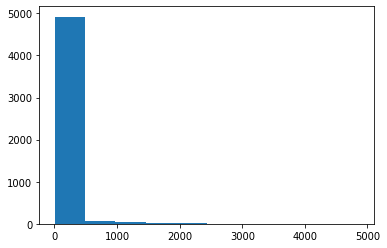

In [871]:
plt.hist(adsup_stat['duo_pickcount'])

- LOL에는 수많은 원딜과 서포터들이 있고, 그 중 비원딜이나 다른 라인에서 잠시 내려온 서포터도 존재하기 때문에 모든 경우의 수를 고려할 수가 없다.
- 너무 데이터가 없는 값은 삭제하기로 한다.
- 평균 66회의 듀오픽이지만, 데이터가 좌측에 극단적으로 몰려있으므로, 임의적으로 300회 이상의 듀오 카운트를 가진 데이터만 사용하고자 한다.


In [910]:
adsup_stat_cut=adsup_stat[adsup_stat['duo_pickcount']>1000]

(array([29., 25., 12., 10.,  2.,  5.,  6.,  1.,  4.,  1.]),
 array([1003., 1389., 1775., 2161., 2547., 2933., 3319., 3705., 4091.,
        4477., 4863.]),
 <a list of 10 Patch objects>)

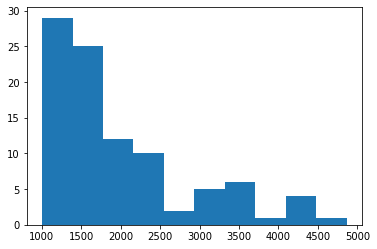

In [911]:
plt.hist(adsup_stat_cut['duo_pickcount']) # 나름 고른 모습을 보여줌.

In [913]:
len(adsup_stat_cut) # 17만건 게임의 95개의 듀오 대상

95

In [914]:
adsup_stat_cut.sort_values(by='duo_pickcount',axis=0,ascending=False)[0:10]

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickcount,duo_pickrate,adc_champ,adc_champ_kill,adc_champ_deaths,adc_champ_assists,sup_champ,sup_champ_kill,sup_champ_deaths,sup_champ_assists,adc_kda,sup_kda,duo_kda
2430,이즈리얼,유미,0.506272,4863,0.028634,81.0,4.597779,4.586264,5.623895,350.0,1.385359,3.368702,11.436356,3.119022,5.636751,3.929879
2244,케이틀린,럭스,0.525448,4244,0.024990,51.0,5.031810,4.272385,5.784402,99.0,1.853676,4.178841,10.144439,3.754476,4.401709,3.633365
2421,이즈리얼,카르마,0.507075,4240,0.024966,81.0,5.053066,4.315802,5.728066,43.0,1.468160,4.691274,10.043396,3.578152,3.590779,3.131368
2407,케이틀린,모르가나,0.509229,4226,0.024884,51.0,5.643161,4.299101,6.008045,25.0,1.752485,4.576195,10.868434,3.969241,4.030945,3.548746
2313,이즈리얼,쓰레쉬,0.518960,4193,0.024689,81.0,5.587646,4.062485,6.305986,412.0,1.504412,4.911996,10.655617,4.213351,3.597778,3.445027
2339,케이틀린,쓰레쉬,0.516229,3882,0.022858,51.0,5.379959,4.051777,6.017774,412.0,1.485832,4.502318,10.410098,4.117193,3.889768,3.546625
2379,이즈리얼,세나,0.511915,3567,0.021003,81.0,4.804878,4.395290,5.835716,235.0,2.199327,4.754976,10.538548,3.512952,3.898740,3.254556
2417,애쉬,쓰레쉬,0.507582,3495,0.020579,22.0,4.632332,4.482976,7.668383,412.0,1.668097,4.513305,11.112446,3.922616,4.154829,3.593705
2359,이즈리얼,바드,0.514318,3492,0.020562,81.0,5.010309,4.036942,6.107961,432.0,1.762027,4.266896,11.226231,4.063426,4.629270,3.891753
3080,진,쓰레쉬,0.495389,3470,0.020432,202.0,5.465130,3.734006,7.092795,412.0,1.566859,4.673487,10.816427,4.957906,3.879267,3.975793


- 이즈리얼, 유미 듀오가 가장 많이 나왔다. 유미는 원거리 딜러의 몸에 달라붙어 있기 때문에 생존기가 우월한 이즈리얼이 자주 등장한다.
- 그 뒤로 케이틀린, 럭스 & 케이틀린, 모르가나이다. 케이틀린은 덫을 활용하여 헤드샷을 최대한 쏴 라인전을 강하게 가져가야 하기 때문에 원거리 속박기가 있는 럭스, 모르가나가 선호되었다.
- 그 뒤로 이즈리얼, 카르마이다. 역시 하드포킹 조합이다.
- 모두 솔로랭크에서 자주 볼 수 있는 조합이며, 승률도 대부분 50%를 넘는 모습을 보여주었다.

## 2. 가장 승률이 높은 듀오는?


In [915]:
adsup_stat_cut.sort_values(by='duo_winrate',axis=0,ascending=False)[0:10]

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickcount,duo_pickrate,adc_champ,adc_champ_kill,adc_champ_deaths,adc_champ_assists,sup_champ,sup_champ_kill,sup_champ_deaths,sup_champ_assists,adc_kda,sup_kda,duo_kda
2104,애쉬,노틸러스,0.541757,1377,0.008108,22.0,4.705882,4.826434,8.086420,111.0,1.926652,4.979666,10.158315,3.756724,3.536137,3.193174
2130,진,세나,0.537859,2298,0.013531,202.0,4.634465,4.072672,6.918190,235.0,2.295039,4.542211,10.940818,4.117651,4.219340,3.725413
2137,루시안,파이크,0.537402,1524,0.008974,236.0,5.406824,4.609580,6.942913,555.0,4.921260,4.927822,7.171260,3.749140,3.602273,3.215879
2145,케이틀린,유미,0.536047,1179,0.006942,51.0,4.251908,4.541985,5.154368,350.0,1.290925,3.323155,11.159457,3.044244,5.419383,3.787956
2150,애쉬,카르마,0.535654,1781,0.010487,22.0,4.007861,4.586188,7.003369,43.0,1.693992,4.211679,10.423919,3.407059,4.210093,3.370578
2167,카이사,파이크,0.532918,1443,0.008497,145.0,5.753985,4.540541,6.823285,555.0,4.772003,5.115731,7.383922,3.989706,3.389489,3.236313
2171,케이틀린,레오나,0.532544,1521,0.008956,51.0,5.132150,4.278107,6.109139,89.0,1.451019,4.771203,9.378698,3.762479,3.198289,3.025641
2185,루시안,판테온,0.530904,2168,0.012766,236.0,5.379151,4.238007,6.383764,80.0,3.808118,5.463561,8.514760,4.034365,3.250431,3.182196
2191,루시안,쓰레쉬,0.530204,3046,0.017935,236.0,5.850295,4.183519,5.876231,412.0,1.612607,4.452068,10.793828,4.041651,4.091810,3.615233
2205,진,카르마,0.529073,1909,0.011241,202.0,4.672603,3.826611,6.490309,43.0,1.514929,4.398638,10.182294,4.231704,3.833982,3.589838


- 애쉬, 노틸러스는 CC에 맞을경우 한방에 갈 확률이 매우 높은 듀오이다. 두 챔프 모두 많은 CC기를 보유하고 있으며, 애쉬의 긴 사거리와 노틸러스의 닻줄을 통해 라인전을 강하게 가져간다.
- 진, 세나는 원거리 딜링, CC지원으로 상체의 캐리를 돕는 픽이다. 역시 궁합이 좋은 편이라고 할 수 있따.
- 루시안, 파이크는 사거리는 짧지만 파이크의 CC가 한번 닿을 경우, 상대 듀오를 모두 잡아낼 수 있는 픽이다.
- 그 외에 솔로랭크에서 궁합이 좋은 챔피언들이 구성되었다.

## 3. 가장 티어 (픽률, 승률, KDA 기준) 가 높은 듀오는?
- 듀오 픽률, 듀오 승률, 듀오 KDA를 기준으로 티어를 5티어까지 나눠보고자 한다.
- 세 변수를 기준으로 K-means 군집분석을 실시하여 군집을 나눈 후, 군집에 따라 티어를 책정했다.

In [1121]:
adsup_stat_clustering=adsup_stat_cut[['adc_champ_name','sup_champ_name','duo_winrate','duo_pickrate','duo_kda']]
adsup_stat_clustering.reset_index(inplace=True)
del adsup_stat_clustering['index']
adsup_stat_clustering

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda
0,애쉬,노틸러스,0.541757,0.008108,3.193174
1,진,세나,0.537859,0.013531,3.725413
2,루시안,파이크,0.537402,0.008974,3.215879
3,케이틀린,유미,0.536047,0.006942,3.787956
4,애쉬,카르마,0.535654,0.010487,3.370578
...,...,...,...,...,...
90,진,모르가나,0.496326,0.010416,3.826456
91,진,레오나,0.495687,0.008874,3.562707
92,진,쓰레쉬,0.495389,0.020432,3.975793
93,진,제라스,0.493585,0.007802,3.459623


In [1109]:
X=np.array(adsup_stat_clustering.iloc[:,2:5])
X[0:5]

array([[0.54175744, 0.00810806, 3.19317357],
       [0.53785901, 0.0135311 , 3.7254134 ],
       [0.53740157, 0.00897363, 3.21587927],
       [0.5360475 , 0.0069422 , 3.78795589],
       [0.53565413, 0.0104869 , 3.37057833]])

In [1110]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X)

In [1111]:
adsup_stat_clustering

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda
0,애쉬,노틸러스,0.541757,0.008108,3.193174
1,진,세나,0.537859,0.013531,3.725413
2,루시안,파이크,0.537402,0.008974,3.215879
3,케이틀린,유미,0.536047,0.006942,3.787956
4,애쉬,카르마,0.535654,0.010487,3.370578
...,...,...,...,...,...
90,진,모르가나,0.496326,0.010416,3.826456
91,진,레오나,0.495687,0.008874,3.562707
92,진,쓰레쉬,0.495389,0.020432,3.975793
93,진,제라스,0.493585,0.007802,3.459623


In [1144]:
X=pd.DataFrame(X_train_scale,columns=adsup_stat_clustering.columns[2:5])
X.head()

,duo_winrate,duo_pickrate,duo_kda
0,2.455870,-0.656267,-0.878964
1,2.098076,0.376209,0.715085
2,2.056094,-0.491475,-0.810961
3,1.931818,-0.878233,0.902398
4,1.895715,-0.203368,-0.347640


In [1113]:
model = KMeans(n_clusters=5,algorithm='auto')
feature = X[['duo_winrate','duo_pickrate','duo_kda']]

In [1114]:
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [1115]:
adsup_stat_clustering_output=pd.concat([adsup_stat_clustering,predict], axis=1)

In [1143]:
adsup_stat_clustering_output.head()

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,predict,tier
0,애쉬,노틸러스,0.541757,0.008108,3.193174,3,4티어
1,진,세나,0.537859,0.013531,3.725413,4,2티어
2,루시안,파이크,0.537402,0.008974,3.215879,3,4티어
3,케이틀린,유미,0.536047,0.006942,3.787956,4,2티어
4,애쉬,카르마,0.535654,0.010487,3.370578,3,4티어


In [1118]:
count=adsup_stat_clustering_output.groupby('predict').count()['adc_champ_name']
count 

predict
0    13
1    22
2    17
3    15
4    28
Name: adc_champ_name, dtype: int64

In [1119]:
X=pd.concat([X,predict],axis=1)

In [1128]:
X.groupby('predict').mean().mean(axis=1)
# 2 -> 1티어, 4 -> 2티어, 0 -> 3티어, 3 -> 4티어, 4 -> 5티어

predict
0    0.022208
1   -0.657557
2    0.651151
3   -0.184536
4    0.209858
dtype: float64

In [1147]:
adsup_stat_clustering_output['tier']=''
for i in range(len(adsup_stat_clustering_output)):
    if adsup_stat_clustering_output['predict'][i]==2:
        adsup_stat_clustering_output['tier'][i]='1티어'
    elif adsup_stat_clustering_output['predict'][i]==4:
        adsup_stat_clustering_output['tier'][i]='2티어'
    elif adsup_stat_clustering_output['predict'][i]==0:
        adsup_stat_clustering_output['tier'][i]='3티어'
    elif adsup_stat_clustering_output['predict'][i]==3:
        adsup_stat_clustering_output['tier'][i]='4티어'
    else:
        adsup_stat_clustering_output['tier'][i]='5티어'
del adsup_stat_clustering_output['predict']

In [1156]:
adsup_stat_clustering_output.head()

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,tier
0,애쉬,노틸러스,0.541757,0.008108,3.193174,4티어
1,진,세나,0.537859,0.013531,3.725413,2티어
2,루시안,파이크,0.537402,0.008974,3.215879,4티어
3,케이틀린,유미,0.536047,0.006942,3.787956,2티어
4,애쉬,카르마,0.535654,0.010487,3.370578,4티어


In [1160]:
adsup_stat_clustering_output[adsup_stat_clustering_output['tier']=='1티어'] #1티어 바텀듀오

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,tier
8,루시안,쓰레쉬,0.530204,0.017935,3.615233,1티어
17,케이틀린,럭스,0.525448,0.024990,3.633365,1티어
22,애쉬,룰루,0.522707,0.020096,3.923821,1티어
31,이즈리얼,쓰레쉬,0.518960,0.024689,3.445027,1티어
33,이즈리얼,룰루,0.518637,0.018483,3.638738,1티어
34,카이사,쓰레쉬,0.518569,0.017441,3.637407,1티어
44,케이틀린,쓰레쉬,0.516229,0.022858,3.546625,1티어
51,이즈리얼,바드,0.514318,0.020562,3.891753,1티어
55,이즈리얼,세나,0.511915,0.021003,3.254556,1티어
57,이즈리얼,럭스,0.510967,0.019060,3.467717,1티어


- 1티어 바텀듀오는 위와 같다.
- 대부분의 경기에서 등장했으며, 승률과 픽률 모두 높은 양상을 띈다.
- 솔로랭크에서 대부분 한 번쯤 봤던 조합이며, 이따금 대회에서 나오기도 하는 조합이다.

In [1161]:
adsup_stat_clustering_output[adsup_stat_clustering_output['tier']=='2티어'] #2티어 바텀듀오

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,tier
1,진,세나,0.537859,0.013531,3.725413,2티어
3,케이틀린,유미,0.536047,0.006942,3.787956,2티어
9,진,카르마,0.529073,0.011241,3.589838,2티어
10,미스 포츈,세나,0.528897,0.006724,3.464974,2티어
12,미스 포츈,룰루,0.528157,0.006901,3.836177,2티어
13,세나,럭스,0.527016,0.007084,4.038238,2티어
16,진,판테온,0.525875,0.015474,3.656012,2티어
18,루시안,룰루,0.525277,0.009551,3.446979,2티어
19,진,럭스,0.524694,0.012995,4.072497,2티어
20,징크스,쓰레쉬,0.523225,0.006718,3.718668,2티어


In [1162]:
adsup_stat_clustering_output[adsup_stat_clustering_output['tier']=='3티어'] #3티어 바텀듀오

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,tier
46,세나,쓰레쉬,0.515087,0.011123,4.084701,3티어
52,세나,판테온,0.513417,0.009875,3.957066,3티어
58,루시안,유미,0.510773,0.009292,4.242079,3티어
61,진,바드,0.510454,0.011547,4.233554,3티어
63,베인,룰루,0.510402,0.008491,3.859223,3티어
68,케이틀린,룰루,0.507591,0.014350,3.640542,3티어
70,진,알리스타,0.507313,0.006442,3.723035,3티어
78,진,룰루,0.503639,0.008090,3.880640,3티어
79,이즈리얼,질리언,0.503497,0.007578,3.655789,3티어
86,진,유미,0.500000,0.007184,4.466393,3티어


In [1163]:
adsup_stat_clustering_output[adsup_stat_clustering_output['tier']=='4티어'] #4티어 바텀듀오

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,tier
0,애쉬,노틸러스,0.541757,0.008108,3.193174,4티어
2,루시안,파이크,0.537402,0.008974,3.215879,4티어
4,애쉬,카르마,0.535654,0.010487,3.370578,4티어
5,카이사,파이크,0.532918,0.008497,3.236313,4티어
6,케이틀린,레오나,0.532544,0.008956,3.025641,4티어
7,루시안,판테온,0.530904,0.012766,3.182196,4티어
11,애쉬,판테온,0.528377,0.013384,3.198416,4티어
14,카이사,세트,0.526570,0.006094,2.904348,4티어
15,루시안,럭스,0.526062,0.006100,3.280888,4티어
23,케이틀린,카르마,0.521627,0.009121,2.932214,4티어


In [1164]:
adsup_stat_clustering_output[adsup_stat_clustering_output['tier']=='5티어'] #5티어 바텀듀오

,adc_champ_name,sup_champ_name,duo_winrate,duo_pickrate,duo_kda,tier
47,이즈리얼,판테온,0.515083,0.013078,3.034219,5티어
53,루시안,블리츠크랭크,0.513109,0.011005,3.360086,5티어
54,애쉬,파이크,0.512617,0.008167,3.389329,5티어
59,이즈리얼,알리스타,0.510542,0.007820,3.375000,5티어
62,애쉬,레오나,0.510436,0.009309,3.179633,5티어
64,애쉬,블리츠크랭크,0.510293,0.010870,3.384074,5티어
65,카이사,판테온,0.509731,0.012707,3.020389,5티어
67,이즈리얼,소라카,0.508581,0.010293,3.270595,5티어
72,이즈리얼,노틸러스,0.506587,0.009833,3.119760,5티어
73,이즈리얼,잔나,0.506425,0.007790,3.554800,5티어


- 5티어 바텀조합이다. 주의해야 할 것은 1000회 이상 데이터가 기록된 데이터를 바탕으로 분석을 진행한 것이기 때문에 이 조합이 꼭 나쁘다는 것은 아니다.
- 상위티어 챔피언 구성에 비해 다소 지표가 떨어진다.

# 한계점
- 듀오승률, 듀오픽률, KDA 만 고려했을 뿐, 데미지 딜링이나 골드 수급 등 많은 변수를 고려하지 않은 분석이다. 특히 KDA라는 지표는 허점이 많은 지표이기 때문에 보정이나 다른 데이터 대체가 필요할 수도 있다.
- 픽률이 군집분석에서 너무 높은 부분을 가져 간듯 하다. 케이틀린, 이즈리얼같은 국민픽이라고 해서 반드시 상위티어 일수는 없다.
- 다른 고차원적인 분석이 분명 존재할 것이다.

# 보완해야 할 점
- JSON 파일을 다루는 데에 좀 더 익숙해져야 한다. JSON 파일 로드에 굉장히 많은 시간을 쏟았고, 결국 내부를 임의적으로 바꿔 로드하는데 그치고 말았다. 결과위주의 분석이기 때문에 추후 코드최적화가 반드시 필요하다.
- 리그오브레전드에 대한 이해도가 더욱 필요하다. 게임 상세정보에 분명 더 좋은 인사이트를 추출할 부분이 있을 것이다.